## MMAI 844 Facial Recognition Demo

### Facial Image Classification with Tensorflow pre-trained model

Face recognition is the general task of identifying and verifying people from photographs of their face.

### Step 1.1: Imports Libraries
Import libraries and define environment variables

In [206]:
import cv2
import numpy as np
import os
import math
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
print(cv2.__version__)
%matplotlib inline
cv2.startWindowThread()
from os import listdir
from PIL import Image
import warnings
warnings.filterwarnings(action='once')
import urllib.request

4.4.0


In [208]:
from keras.engine import  Model
from keras.layers import Flatten, Dense, Input
from keras_vggface.vggface import VGGFace
from tensorflow.keras import datasets, layers, models
from keras.optimizers import RMSprop, SGD

### Step 1.2: Load Data/Image
#### Read and Write Images
``` python
cv2.imwrite(file_path (str), image (numpy.ndarray))
cv2.imread(file_path (str), read_mode (int))```
#### Read Modes
-  ```1 = cv2.IMREAD_COLOR```
-  ```0 = cv2.IMREAD_GRAYSCALE```
- ```-1 = cv2.IMREAD_UNCHANGED```

Load a Sample Simith image using opencv library

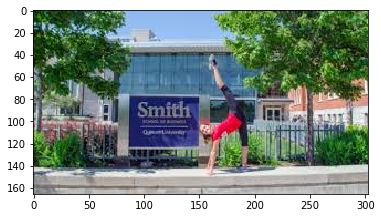

In [209]:
p1 = cv2.imread("smith.jpg", 1)
p1 = cv2.cvtColor(p1, cv2.COLOR_BGR2RGB)
plt.imshow(p1)
plt.show()

You can also Take a Picture or start video with your webcam

In [204]:
def plt_show(image, title=""):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.title(title)
    plt.imshow(image, cmap="Greys_r")
    plt.show()
    
########################################
#Take a Picture when you camera is free
#########################################
webcam = cv2.VideoCapture(0)
ret, frame = webcam.read()
print(ret)
webcam.release()
if ret:
    plt_show(frame)
else:
    print("Camera is not available")

### Step 1.3: Detecting Faces with OpenCV and front face detector xml 
``` python
detector = cv2.CascadeClassifier( xml_file_path)
face_coord = detector.detectMultiScale(image, scale_factor, min_neighbors, min_size, flags)
```
face_coord: Numpy array with rows equal to [x, y, width, height]

Let import a image to detect faces

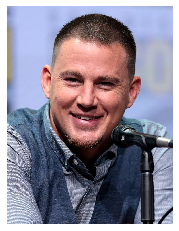

In [217]:
frame= cv2.imread('channing_tatum.jpg')
name= "channing_tatum"
plt_show(frame)

In [218]:
detector = cv2.CascadeClassifier("xml/frontal_face.xml")

scale_factor = 1.2
min_neighbors = 5
min_size = (40, 40)
biggest_only = True
flags = cv2.CASCADE_FIND_BIGGEST_OBJECT | \
            cv2.CASCADE_DO_ROUGH_SEARCH if biggest_only else \
            cv2.CASCADE_SCALE_IMAGE
        
faces_coord = detector.detectMultiScale(frame,
                                        scaleFactor=scale_factor,
                                        minNeighbors=min_neighbors,
                                        minSize=min_size,
                                        flags=flags)
print("Type: " + str(type(faces_coord)))
print("this is face coordinator in the picture is {}".format(faces_coord))
print("Face is successfully detected!! Let draw a box on the picture")

Type: <class 'numpy.ndarray'>
this is face coordinator in the picture is [[197 211 512 512]]
Face is successfully detected!! Let draw a box on the picture


In [219]:
def draw_rectangle(image, coords):
    for (x, y, w, h) in coords:
        w_rm = int(0.2 * w / 2) 
        cv2.rectangle(image, (x + w_rm, y), (x + w - w_rm, y + h), 
                              (0, 0, 255), 8)

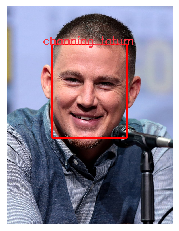

In [220]:
draw_rectangle(frame,faces_coord)
cv2.putText(frame, name,    
                            (faces_coord[0][0], faces_coord[0][1]),
                            cv2.FONT_HERSHEY_SIMPLEX , 2, (66, 53, 243), 6)
plt_show(frame)

In [221]:
#Wrap up the code into a face detector module
class FaceDetector(object):
    def __init__(self, xml_path):
        self.classifier = cv2.CascadeClassifier(xml_path)
    
    def detect(self, image, biggest_only=True):
        scale_factor = 1.2
        min_neighbors = 5
        min_size = (30, 30)
        biggest_only = True
        flags = cv2.CASCADE_FIND_BIGGEST_OBJECT | \
                    cv2.CASCADE_DO_ROUGH_SEARCH if biggest_only else \
                    cv2.CASCADE_SCALE_IMAGE
        faces_coord = self.classifier.detectMultiScale(image,
                                                       scaleFactor=scale_factor,
                                                       minNeighbors=min_neighbors,
                                                       minSize=min_size,
                                                       flags=flags)
        return faces_coord

### Step 1.4: Cut Faces and resize faces

for (x, y, w, h) in faces_coord:
    cv2.rectangle(frame, (x, y), (x + w, y + h), (150, 150, 0), 8)
plt_show(frame) 

In [222]:
def cut_faces(image, faces_coord):
    faces = []
      
    for (x, y, w, h) in faces_coord:
        w_rm = int(0.2 * w / 2)
        faces.append(image[y: y + h, x + w_rm: x + w - w_rm])
         
    return faces

In [223]:
Cut_Face = cut_faces(frame, faces_coord)

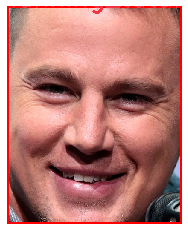

In [224]:
plt_show(Cut_Face[0])

In [225]:
def resize(images, size=(224, 224)):
    images_norm = []
    for image in images:
        if image.shape < size:
            image_norm = cv2.resize(image, size, 
                                    interpolation = cv2.INTER_AREA)
        else:
            image_norm = cv2.resize(image, size, 
                                    interpolation = cv2.INTER_CUBIC)
        images_norm.append(image_norm)

    return images_norm 

In [226]:
resize_faces = resize(Cut_Face)

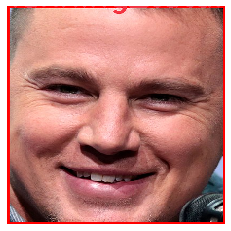

In [227]:
plt_show(resize_faces[0])

### Step 1.5: Standerdize the image

In [232]:
Resize_face = resize_faces[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


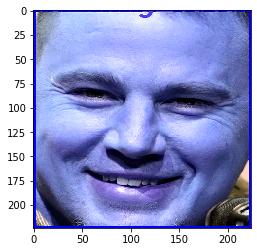

In [235]:
plt.imshow(Resize_face/225.0)

## Step2:Pre-trained Model in Tensorflow

### Step 2.1 Install libraries

VGGFace and VGGFace2 Models

The VGGFace refers to a series of models developed for face recognition and demonstrated on benchmark computer vision datasets by members of the Visual Geometry Group (VGG) at the University of Oxford.

To install Keras_vggface: "sudo pip install git+https://github.com/rcmalli/keras-vggface.git"

In [237]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to c:\users\admin\appdata\local\temp\pip-req-build-u3vwn9ob
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8385 sha256=bf77133d9c49f878f69df171e06a5feb11db2176d90c264c8b73553b77242b09
  Stored in directory: C:\Users\admin\AppData\Local\Temp\pip-ephem-wheel-cache-p4oyni5m\wheels\08\df\86\0225d44647ab2256dbf1e006823288fe9cc86367a056e6ea2c
Successfully built keras-vggface


  Running command git clone -q https://github.com/rcmalli/keras-vggface.git 'C:\Users\admin\AppData\Local\Temp\pip-req-build-u3vwn9ob'
C:\Users\admin\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedWriter name=6>
  return process_handler(cmd, _system_body)
C:\Users\admin\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)
C:\Users\admin\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  return process_handler(cmd, _system_body)


In [262]:
!pip show keras-vggface

Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: c:\users\admin\anaconda3\lib\site-packages
Requires: pillow, h5py, six, numpy, keras, pyyaml, scipy
Required-by: 


In [243]:
# check version of keras_vggface
import keras
import keras_vggface
# print version
print(keras_vggface.__version__)
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions
from numpy import asarray

0.6


### Step 2.1: Verify Data and Predict the image using Pre-train model

In [246]:
# from numpy import asarray
# # extract a single face from a given photograph
def extract_face_from_file(filename, required_size=(224, 224)):
    # load image from file
    pixels = plt.imread(filename)
    detector = FaceDetector("xml/frontal_face.xml")
    # create the detector, using default weights
    faces_coord = detector.detect(image=pixels)
    faces = cut_faces(pixels, faces_coord)
    faces = resize(faces)
    return faces[0]

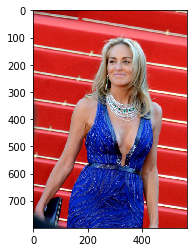

In [247]:
Sample= plt.imread('sharon_stone1.jpg')
plt.imshow(Sample)

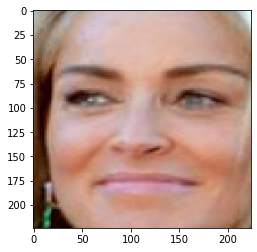

In [250]:
# load the photo and extract the face
extract_face = extract_face_from_file('sharon_stone1.jpg')
# plot the extracted face
plt.imshow(extract_face)

### Step 2.2 Check Model Input and output, and model summary

In [257]:
from keras_vggface.vggface import VGGFace
# create a vggface2 model
model = VGGFace(model='resnet50')
# summarize input and output shape
print('Inputs: %s' % model.inputs)
print('Outputs: %s' % model.outputs)

Inputs: [<tf.Tensor 'input_12:0' shape=(None, 224, 224, 3) dtype=float32>]
Outputs: [<tf.Tensor 'classifier/Softmax_3:0' shape=(None, 8631) dtype=float32>]


We can see that the model expects input color images of faces with the shape of 244×244 and the output will be a class prediction of 8,631 people. the input dimension is 4. This means that you have to reshape your training set with .reshape(n_images, 286, 384, 1)

In [256]:
#prints out summary of model
model.summary()

Model: "vggface_resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_11[0][0]                   
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_98 (Activation)      (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
___________________________________________________________________________________

### Step 2.2 Prepare input for faces

In [258]:
Face_array = asarray(extract_face,'float32')
Preprocess_face = preprocess_input(Face_array, version=2)
print(Preprocess_face.shape)
Preprocess_face_input = Preprocess_face.reshape(1, 224, 224, 3)
print(Preprocess_face_input.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [259]:
# perform prediction
yhat = model.predict(Preprocess_face_input)

In [260]:
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
    print('%s: %.3f%%' % (result[0], result[1]*100))

b' Sharon_Stone': 98.955%
b' Tina_Maze': 0.238%
b' Noelle_Reno': 0.078%
b' Anita_Lipnicka': 0.045%
b' Line_Verndal': 0.034%


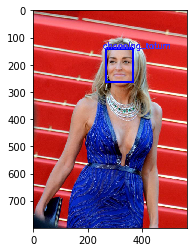

b' Sharon_Stone': 98.955%
b' Tina_Maze': 0.238%
b' Noelle_Reno': 0.078%
b' Anita_Lipnicka': 0.045%
b' Line_Verndal': 0.034%


In [261]:
def draw_rectangle_with_label(image, label):
    faces_coord = detector.detectMultiScale(image,
                                        scaleFactor=scale_factor,
                                        minNeighbors=min_neighbors,
                                        minSize=min_size,
                                        flags=flags)
    draw_rectangle(image,faces_coord)
    cv2.putText(image, name,    
                            (faces_coord[0][0], faces_coord[0][1]),
                            cv2.FONT_HERSHEY_SIMPLEX , 1, (66, 53, 243), 3)

    plt.imshow(image)
    plt.show()
    for result in results[0]:
        print('%s: %.3f%%' % (result[0], result[1]*100))

draw_rectangle_with_label(Sample, results)

### Step 3 Use Pre-trained Model for Your Photo

5-celebrity-faces-dataset
├── train
│   ├── ben_afflek
│   ├── elton_john
│   ├── jerry_seinfeld
│   ├── madonna
│   └── mindy_kaling
└── val
    ├── ben_afflek
    ├── elton_john
    ├── jerry_seinfeld
    ├── madonna
    └── mindy_kaling

In [263]:
from keras.preprocessing.image import ImageDataGenerator

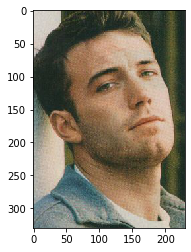

In [264]:
pixels = plt.imread("train/ben_afflek/httpwwwhillsindcomstorebenjpg.jpg")
plt.imshow(pixels)

In [273]:
img_height=224
img_width=224
batch_size=16

nb_train_samples = 93
nb_validation_samples = 25
epochs = 20
batch_size = 16
numclasses = 5

In [266]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    #shear_range=0.2,
    vertical_flip=False,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)


train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    'val',
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='categorical')

Found 93 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [180]:
input_shape = (224, 224, 3)

In [270]:
from keras.engine import  Model
from keras.layers import Flatten, Dense, Input
from keras_vggface.vggface import VGGFace
from tensorflow.keras import datasets, layers, models
from keras.optimizers import RMSprop, SGD

#custom parameters
nb_class = 5
hidden_dim = 200

vgg_model = VGGFace(include_top=False, input_shape=(224, 224, 3))
last_layer = vgg_model.get_layer('pool5').output
x = Flatten(name='flatten')(last_layer)
x = Dense(hidden_dim, activation='relu', name='fc6')(x)
x = Dense(hidden_dim, activation='relu', name='fc7')(x)
out = Dense(nb_class, activation='softmax', name='fc8')(x)
custom_vgg_model = Model(vgg_model.input, out)

In [271]:
custom_vgg_model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)     

In [274]:
lr = 1e-5
decay = 1e-7 #0.0
optimizer = RMSprop(lr=lr, decay=decay)
custom_vgg_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [275]:
history = custom_vgg_model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/20
5/5 [==============================] - 34s 7s/step - loss: 1.6191 - accuracy: 0.1948 - val_loss: 1.6182 - val_accuracy: 0.1875
Epoch 2/20
5/5 [==============================] - 32s 6s/step - loss: 1.5805 - accuracy: 0.2857 - val_loss: 4.6675 - val_accuracy: 0.1875
Epoch 3/20
5/5 [==============================] - 33s 7s/step - loss: 2.0930 - accuracy: 0.2468 - val_loss: 1.5550 - val_accuracy: 0.3750
Epoch 4/20
5/5 [==============================] - 33s 7s/step - loss: 1.4332 - accuracy: 0.5195 - val_loss: 1.5693 - val_accuracy: 0.4375
Epoch 5/20
5/5 [==============================] - 33s 7s/step - loss: 1.4016 - accuracy: 0.4545 - val_loss: 1.8906 - val_accuracy: 0.3125
Epoch 6/20
5/5 [==============================] - 31s 6s/step - loss: 1.2667 - accuracy: 0.5455 - val_loss: 1.4306 - val_accuracy: 0.5000
Epoch 7/20
5/5 [==============================] - 32s 6s/step - loss: 1.3965 - accuracy: 0.4805 - val_loss: 1.4860 - val_accuracy: 0.3750
Epoch 8/20
5/5 [==================

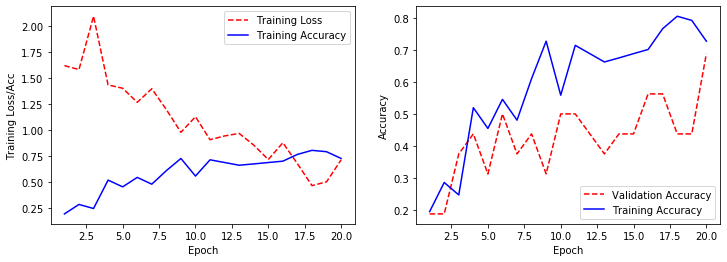

In [276]:
# Get training and test loss histories
training_loss = history.history['loss']
training_acc = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

fig=plt.figure(figsize=(12, 4))
# Visualize loss history
fig.add_subplot(121)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, training_acc, 'b-')
plt.legend(['Training Loss', 'Training Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Training Loss/Acc')

# Get training and test loss histories
val_acc = history.history['val_accuracy']
training_acc = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(val_acc) + 1)

# Visualize loss history
fig.add_subplot(122)
plt.plot(epoch_count, val_acc, 'r--')
plt.plot(epoch_count, training_acc, 'b-')
plt.legend(['Validation Accuracy', 'Training Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show();

In [277]:
saveweight =  'celebriytag_weight.h5'
model.save_weights(saveweight)

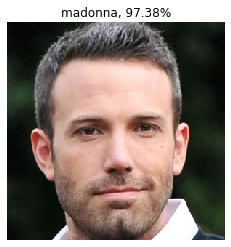

In [278]:
labels = ['ben_afflek',  'elton_john',  'jerry_seinfeld',  'madonna',  'mindy_kaling']
test_imgs = ['val/ben_afflek/123MTENDgMDUODczNDcNTcjpg.jpg']


test_img = 'val/ben_afflek/123MTENDgMDUODczNDcNTcjpg.jpg'
img = image.load_img(test_img, target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.
classes = custom_vgg_model.predict(x)
result = np.squeeze(classes)
result_indices = np.argmax(result)
    
img = cv2.imread(test_img, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.title("{}, {:.2f}%".format(labels[result_indices], result[result_indices]*100))
plt.imshow(img)